# Data Glacier Data Science:: Bank Marketing (Campaign) -- Group Project
# Bank Marketing (Campaign)
 

Problem Statement:

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

 

Why ML Model: Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

This will save resource and their time ( which is directly involved in the cost ( resource billing)).

Develop model with Duration and without duration feature and report the performance of the model.

Duration feature is not recommended as this will be difficult to explain the result to business and also it will

be difficult for business to campaign based on duration.

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
ba_df = pd.read_csv('/content/bank-additional.csv',sep=';')
baf_df = pd.read_csv('/content/bank-additional-full.csv',sep=';')

In [3]:
baf_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
baf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
baf_df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
print( f"No. of duplicated rows: {baf_df.duplicated().sum()}")

No. of duplicated rows: 12


# Observations:
1. From the output of the code, we can see that there are roughly the same amount of categorical and numeric values in the columns.

2. age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed are numerical variables.

3. default, housing and loan have 3 values each (yes, no and unknown).

4. Outcome, y has two values: "yes" and "no".

5. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

6. No Null values found in dataset, meaning that we have a value for every column.

7. There are 12 duplicate rows present in the dataset that can be dropped.

8. We are discarding duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

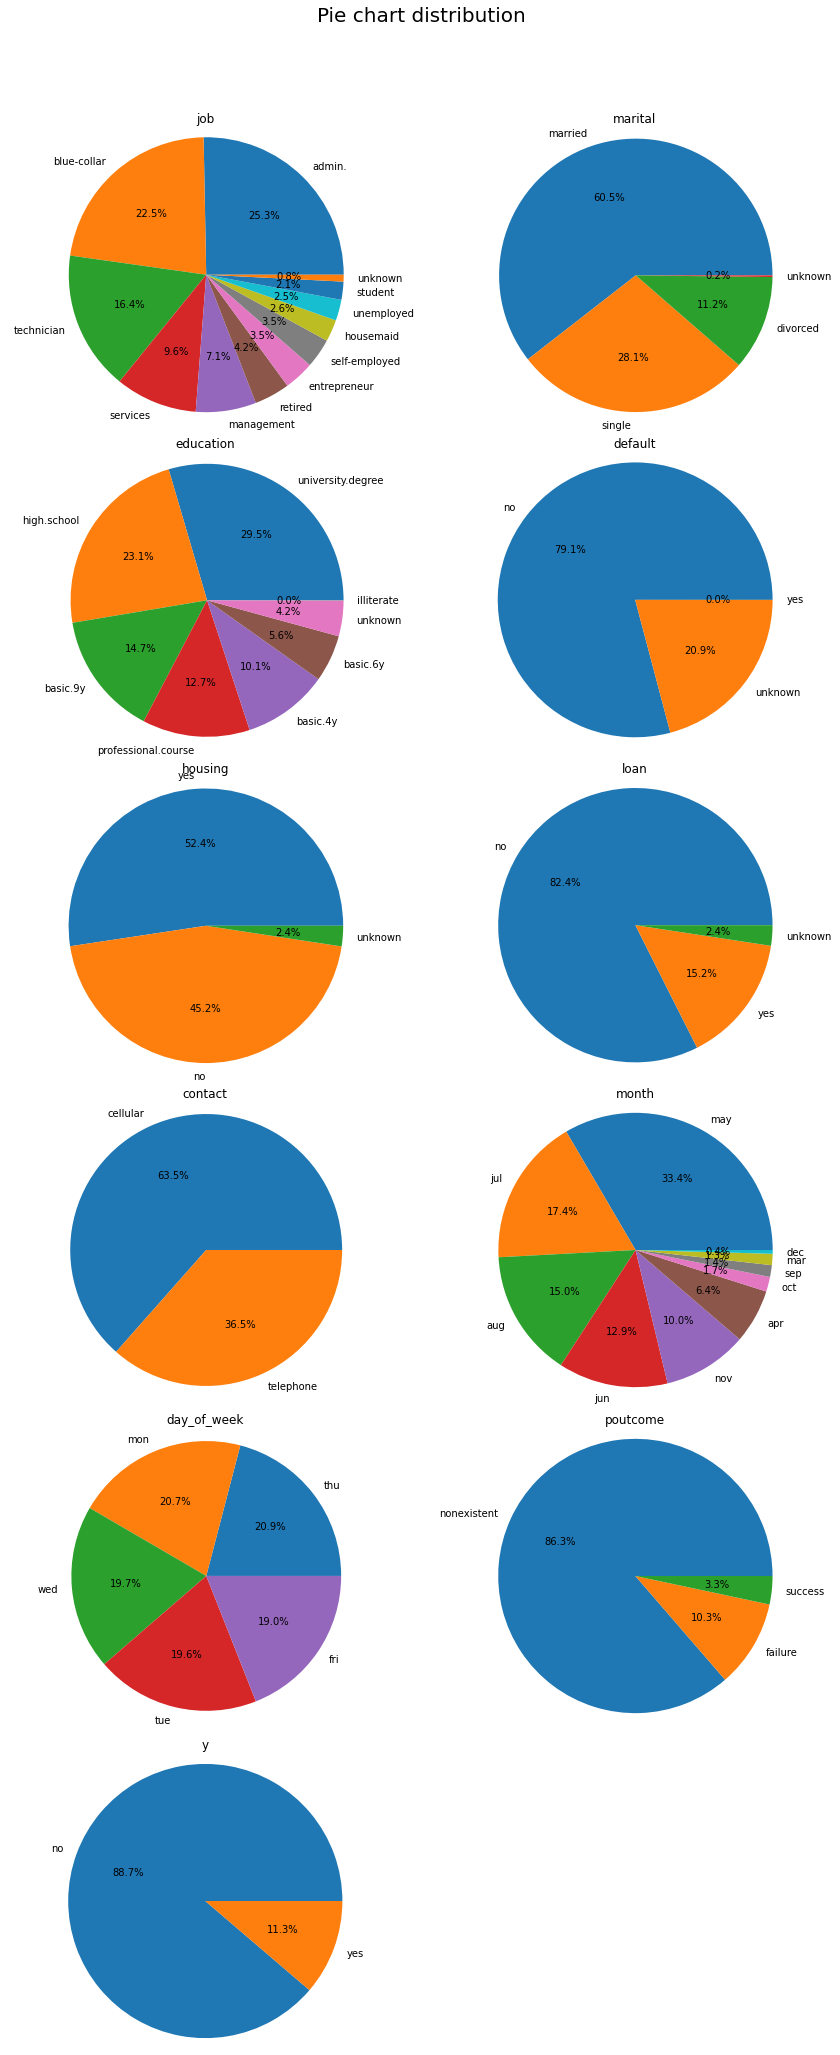

In [7]:
dataset2 = baf_df[['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','day_of_week','poutcome','y']]

fig = plt.figure(figsize=(12,30))
plt.suptitle('Pie chart distribution', fontsize=20)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(6,2,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    
    values = dataset2.iloc[:,i-1].value_counts(normalize = True).values
    index = dataset2.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')

plt.tight_layout(rect=[0,0.03,1,0.95])

From the above pie chart we see that percet for the positive class is 11.3% which means that the proportion of people who agreed to a term deposit (positive class) compared to the people who did not is 11.3%. That tells us that data seems unbalanced and maybe we need to use some balancing technique before building and training the model.

In [8]:
#count the number of rows for each type
baf_df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

Now Lets convert output varaible y from categorical to numerical, which is going to represent 0 for the negative class and 1 for the positive class based on the bank marketing data set. This will be helpful to find corelation between output variable and other features.

In [9]:
baf_df['output'] = (baf_df.y == 'yes').astype('int')

In [10]:
baf_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,output
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Outliers detection
Lets check for distribution of numerical variables with the help of boxplot and see if we can find for any kind of outliers.

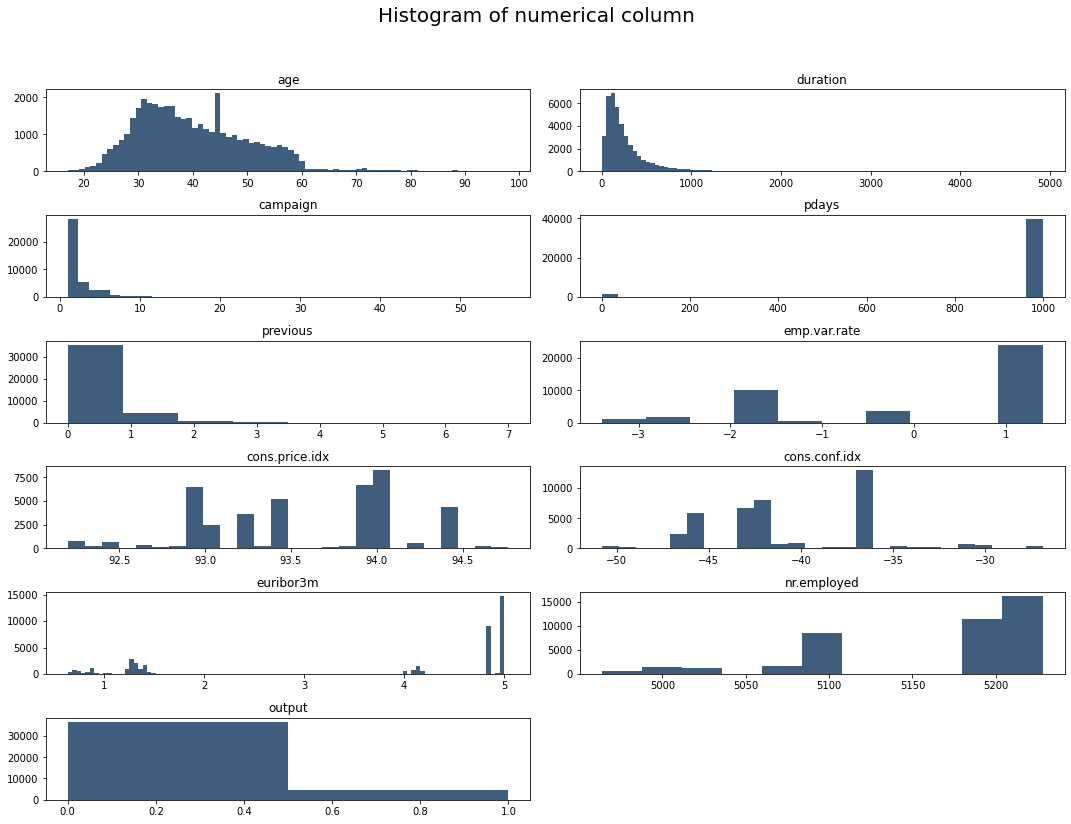

In [11]:
dataset1 = baf_df.drop(columns=['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','day_of_week','poutcome','y'])

fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical column", fontsize=20)

for i in range(dataset1.shape[1]):
    plt.subplot(6,2,i+1)
    f= plt.gca()
    f.set_title(dataset1.columns.values[i])
    
    vals = np.size(dataset1.iloc[:,i].unique())
    if vals>=100:
        vals=100
    
    plt.hist(dataset1.iloc[:,i], bins= vals, color="#3F5D7D")
    
plt.tight_layout(rect=[0,0.03,1,0.95])

In [12]:
baf_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,output
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


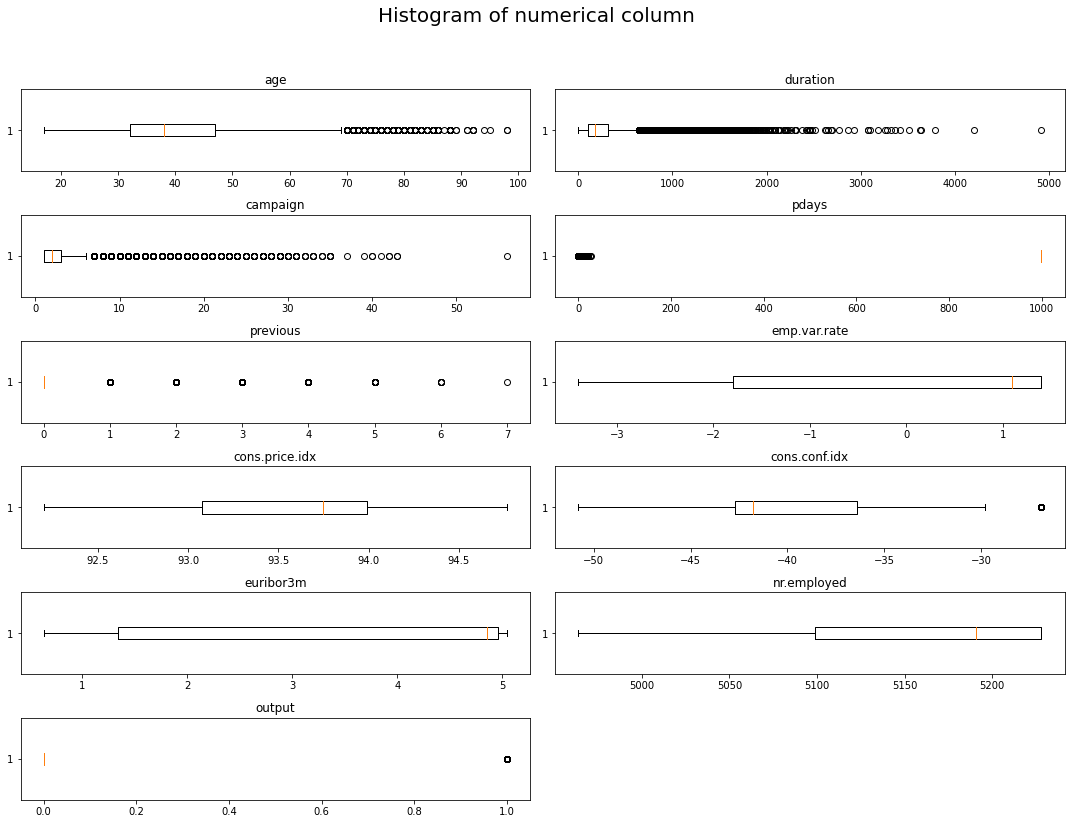

In [13]:
# Box plots

fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical column", fontsize=20)

for i in range(dataset1.shape[1]):
    plt.subplot(6,2,i+1)
    f= plt.gca()
    f.set_title(dataset1.columns.values[i])
    
    
    plt.boxplot(x=dataset1.columns.values[i], data = dataset1, vert=False)
    
plt.tight_layout(rect=[0,0.03,1,0.95])

## Skewness: 

- Positive value implies the assymmetry in the distribution is in the right side of the mean. The tail is in the right.
- Negative value implies the assymmetry in the distribution is in the left side of the mean. The tail is in left.

In [14]:
print(baf_df.skew(axis = 0, skipna = True))

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
output            2.450330
dtype: float64


<ipython-input-14-2b24c5dcc357>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(baf_df.skew(axis = 0, skipna = True))


### Kurtosis: 
- It is the measure of whether or not a distribution has a heavy tail or not relative to the normal distribution.
- Kurtosis > 3 implies the distribution has a heavy tail than the normal distribution.
- Kurtosis < 3 implies the distribution has a light tail than the normal distribution.

In [15]:
print(baf_df.kurt(axis = 0))

age                0.791312
duration          20.247938
campaign          36.979795
pdays             22.229463
previous          20.108816
emp.var.rate      -1.062632
cons.price.idx    -0.829809
cons.conf.idx     -0.358558
euribor3m         -1.406803
nr.employed       -0.003760
output             4.004312
dtype: float64


<ipython-input-15-8fcb0af43be9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(baf_df.kurt(axis = 0))


### Observations

- The box plot for the ‘age’, ‘duration’, and ‘campaign’ feature shows there is a significant number of outliers in distribution.

- For outliers treatment, we can totally drop the outliers from the dataset but that could lead to the loss of some important data, which can help in giving predictions from the model. 

- We can further look at the statistical distribution of these variables to decide further. The maximum values for ‘age’ and ‘campaign’ are 98 and 56 respectively, and they don't seem unrealistic. Therefore the outliers in the data distribution of these features don't need to be dropped.

- As mentioned in the data description we will be dropping the duration column entirely. 


### Corelation map

In [16]:
dataset = baf_df.drop(columns=['y'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:title={'center':'Correlation with output'}>

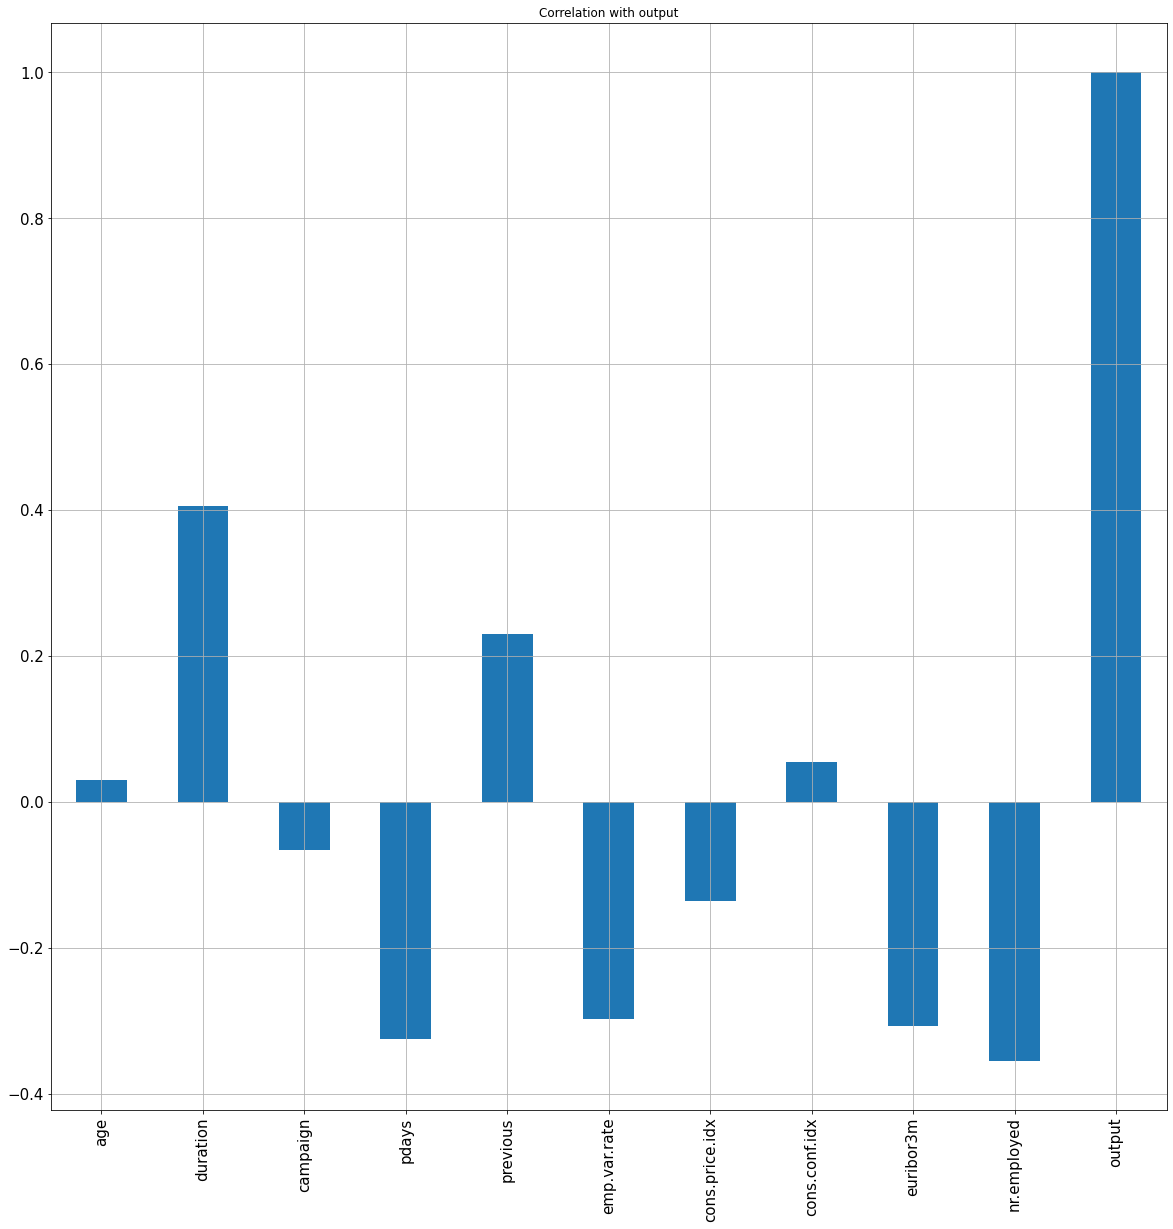

In [17]:

dataset.corrwith(dataset.output).plot.bar(
                    figsize=(20,20), title="Correlation with output", fontsize=15, grid=True)

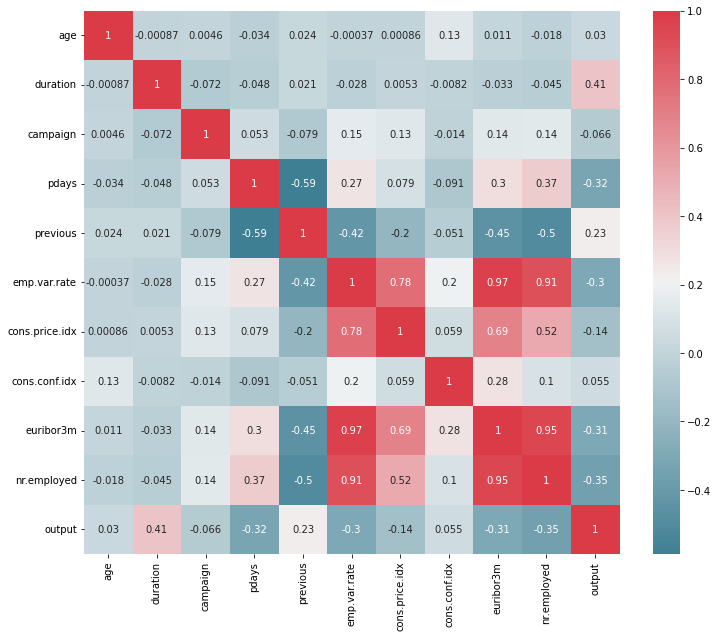

In [18]:
corr = dataset.corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize = (12,10))
sns.heatmap(corr, cmap = cmap, annot=True)
plt.show()

- As we can see from above charts 4 new added features are strongly related to each other.
- Also None of the features are that stronglr related to output varaiable as well
- We can furthur look into how each feature is indivually affecting output to get more insights.

### 'Campaign' and 'y'
'campaign' feature, i.e. number of contacts made to the customer who has/hasn't subscribed to the term deposit plan. Also we can see how number of contacts performed during this campaign combined with other features affects out outcome?

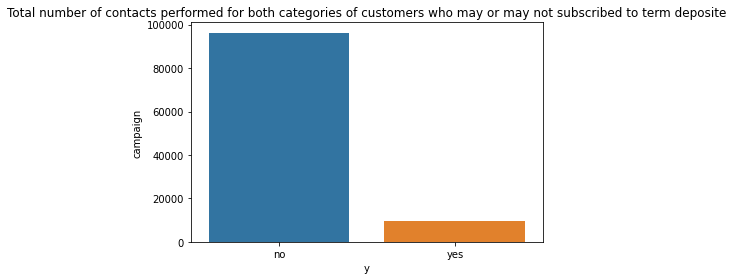

     y  campaign
0   no     96234
1  yes      9520


In [19]:
df = pd.DataFrame(baf_df.groupby('y')['campaign'].sum()).reset_index()

plt.title('Total number of contacts performed for both categories of customers who may or may not subscribed to term deposite')
sns.barplot(x = 'y', y = 'campaign', data = df)
plt.tight_layout()
plt.show()

print(df)

Analysing the previous campaign outcome against the number of contacts made in this campaign

In [20]:
df = baf_df.groupby('poutcome').campaign.sum()
print(df)

poutcome
failure         8526
nonexistent    94745
success         2483
Name: campaign, dtype: int64


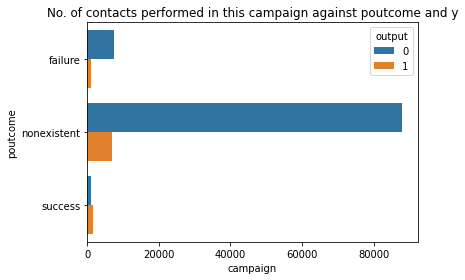

      poutcome  output  campaign
0      failure       0      7398
1      failure       1      1128
2  nonexistent       0     87882
3  nonexistent       1      6863
4      success       0       954
5      success       1      1529


In [21]:
# poutcome, campaign and y
df = pd.DataFrame(baf_df.groupby(['poutcome', 'output']).campaign.sum()).reset_index()

plt.title('No. of contacts performed in this campaign against poutcome and y')
sns.barplot(x=df.campaign, y=df.poutcome, hue = df.output)
plt.tight_layout()
plt.show()

print(df)

For those customers whose outcome of previous campaign was 'nonexistent' and not subscribed to the term deposit plan, almost 87882 contacts were made in this campaign

Lets also look at is there any change in number of customers behaviour from last campaign outcome.

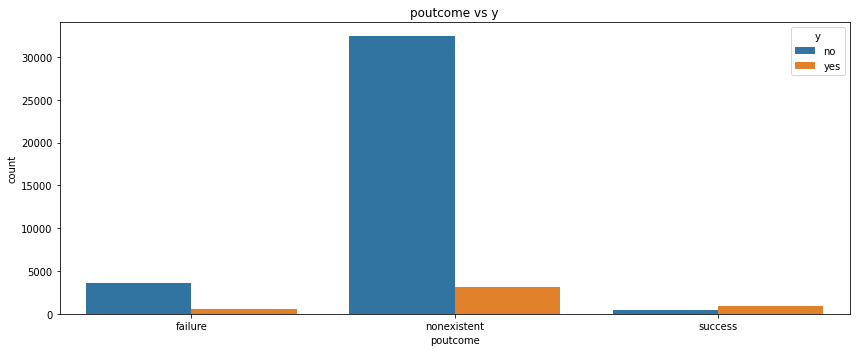

In [22]:
df =  pd.DataFrame(baf_df.groupby('poutcome').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (12,5))
plt.title('poutcome vs y')
sns.barplot(x = 'poutcome', y = 'count', hue = 'y', data = df)
plt.tight_layout()
plt.show()

### 'age' and 'output/y'

Age is varying from 17 to 98 so we can divide them in age groups to see is there any certain age group affecting the outcome?

In [23]:
segments = [17, 25, 40, 60, np.inf]
labels = ['18-25', '26-40', '41-60', '60+']
age_group = pd.cut(dataset.age, segments, labels=labels)
dataset['age_group'] = age_group
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,output,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,41-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,41-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,26-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,26-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,41-60


In [24]:
age_group_count = pd.DataFrame(dataset.groupby('age_group').age.count()).rename({'age':'count'}, axis = 1).reset_index()
print(age_group_count)

  age_group  count
0     18-25   1661
1     26-40  22102
2     41-60  16510
3       60+    910


In [25]:
fig = px.bar(age_group_count, x='age_group', y='count', title= 'Classification of customer base across different age_groups')
fig.show()

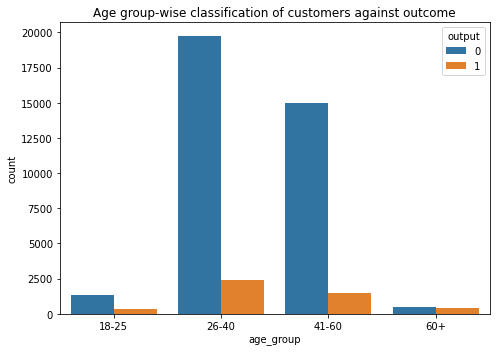

,age_group,output,count
0,18-25,0,1314
1,18-25,1,347
2,26-40,0,19730
3,26-40,1,2372
4,41-60,0,15005
5,41-60,1,1505
6,60+,0,496
7,60+,1,414


In [26]:
df =  pd.DataFrame(dataset.groupby('age_group').output.value_counts()).rename({'output':'count'}, axis = 1).reset_index()
plt.figure(figsize = (7,5))
plt.title('Age group-wise classification of customers against outcome')
sns.barplot(x = 'age_group', y = 'count', hue = 'output', data = df)
plt.tight_layout()
plt.show()
df

Majority of customer base lies in 26-60 year of age. But comparatively 26-20 and 41-60 age group most costumers have not subscribed to term deposite. 
Lets see how does that compare to outcome from previous campaign, is it still same or any improvements?

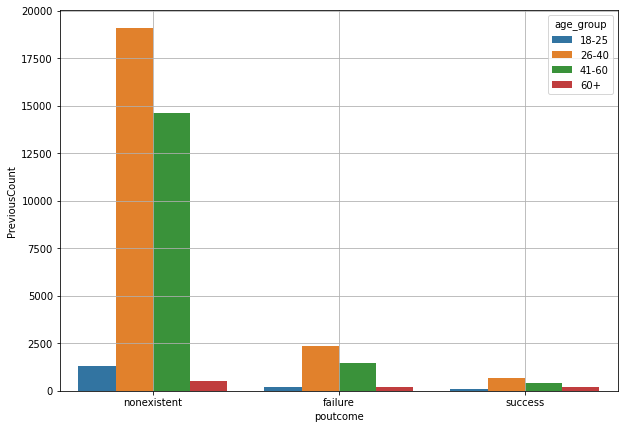

In [27]:
df = pd.DataFrame(dataset.groupby('age_group').poutcome.value_counts()).rename({'poutcome':'PreviousCount'}, axis = 1).reset_index()
plt.figure(figsize = (10,7))
sns.barplot(x='poutcome',y='PreviousCount',hue='age_group',data=df)
plt.grid()
plt.show()

We can also check how many contacts are made per age group

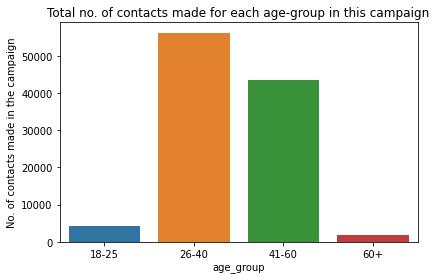

age_group
18-25     4207
26-40    56225
41-60    43521
60+       1790
Name: campaign, dtype: int64


In [28]:
df = dataset.groupby('age_group').campaign.sum()

plt.title('Total no. of contacts made for each age-group in this campaign')
sns.barplot(x=df.index, y=df.values)
plt.ylabel('No. of contacts made in the campaign')
plt.tight_layout()
plt.show()

print(df)

### 'job' and 'output/y'

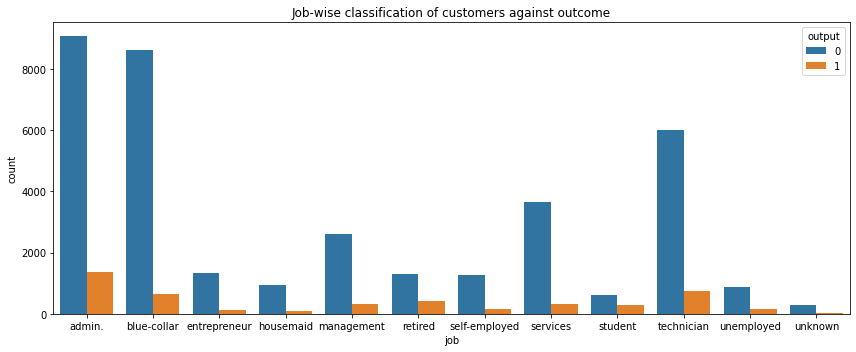

In [29]:
df =  pd.DataFrame(dataset.groupby('job').output.value_counts()).rename({'output':'count'}, axis = 1).reset_index()

plt.figure(figsize = (12,5))
plt.title('Job-wise classification of customers against outcome')
sns.barplot(x = 'job', y = 'count', hue = 'output', data = df)
plt.tight_layout()
plt.show()

Analysing the number of contacts made in this campaign for each profession

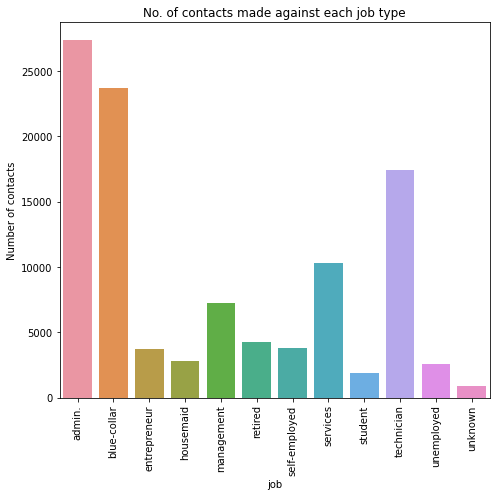

In [30]:
df = dataset.groupby('job').campaign.sum()

plt.figure(figsize = (7,7))
plt.title('No. of contacts made against each job type')
sns.barplot(x=df.index, y=df.values)
plt.xticks(rotation = 90)
plt.ylabel('Number of contacts')
plt.tight_layout()
plt.show()

Lets look at the previous campaign outcome against the job-type

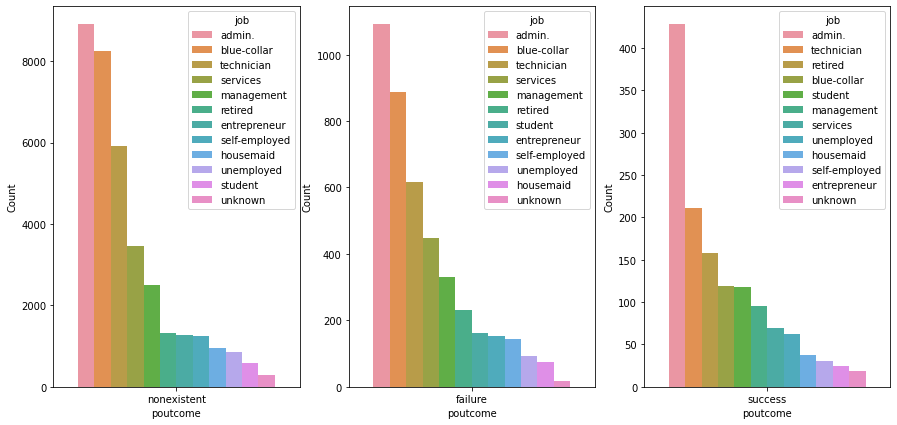

In [31]:
df = pd.DataFrame(dataset.groupby('poutcome').job.value_counts()).rename({'job':'Count'}, axis = 1).reset_index()

fig,ax=plt.subplots(1,3, figsize=(15,7))
sns.barplot(ax=ax[0],x='poutcome',y='Count',hue='job',data=df[df['poutcome']=='nonexistent'])
sns.barplot(ax=ax[1],x='poutcome',y='Count',hue='job',data=df[df['poutcome']=='failure'])
sns.barplot(ax=ax[2],x='poutcome',y='Count',hue='job',data=df[df['poutcome']=='success'])
plt.show()

##### Around 50% of customer base comes under married status. But still more number of married customers are not opting to subscribe term deposite product. Intrestingly when we comapre no of customers subscribing to product vs Not subscribing product, more sing;e customers prefer to bye term deposite.

### 'education' and 'output/y'

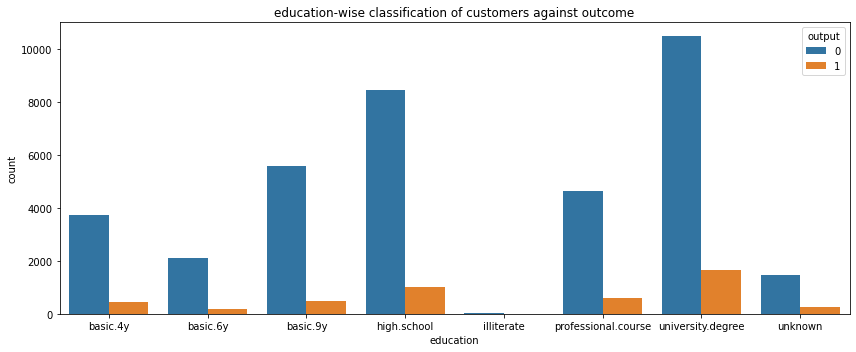

In [32]:
df =  pd.DataFrame(dataset.groupby('education').output.value_counts()).rename({'output':'count'}, axis = 1).reset_index()

plt.figure(figsize = (12,5))
plt.title('education-wise classification of customers against outcome')
sns.barplot(x = 'education', y = 'count', hue = 'output', data = df)
plt.tight_layout()
plt.show()

Lets again look at the previous campaign outcome against the education level

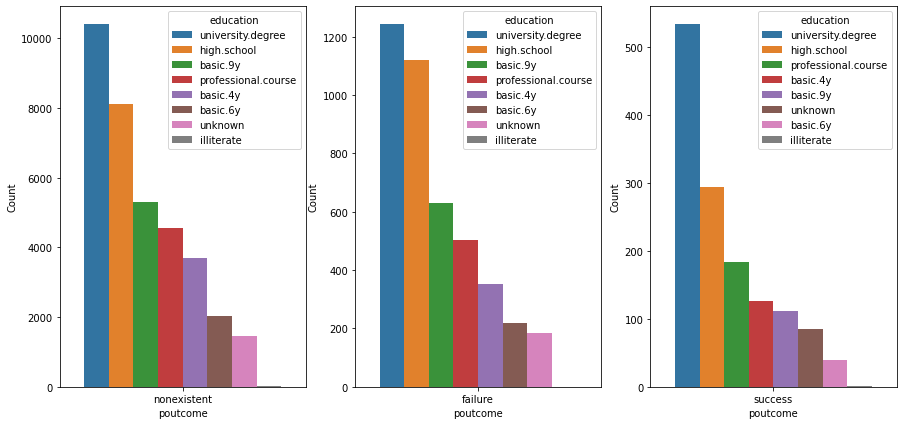

In [33]:
df = pd.DataFrame(dataset.groupby('poutcome').education.value_counts()).rename({'education':'Count'}, axis = 1).reset_index()

fig,ax=plt.subplots(1,3, figsize=(15,7))
sns.barplot(ax=ax[0],x='poutcome',y='Count',hue='education',data=df[df['poutcome']=='nonexistent'])
sns.barplot(ax=ax[1],x='poutcome',y='Count',hue='education',data=df[df['poutcome']=='failure'])
sns.barplot(ax=ax[2],x='poutcome',y='Count',hue='education',data=df[df['poutcome']=='success'])
plt.show()

We can again also look at no of contacts performed per education level of customer base

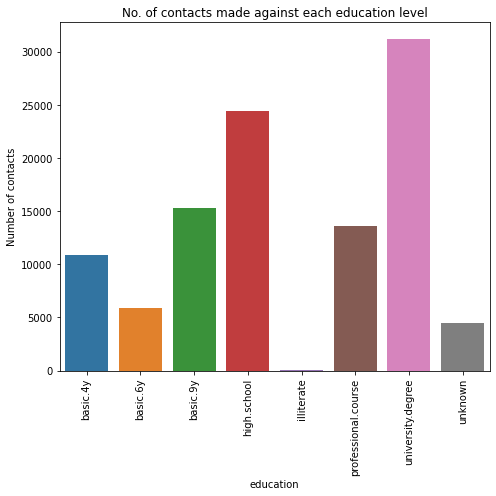

In [34]:
df = dataset.groupby('education').campaign.sum()

plt.figure(figsize = (7,7))
plt.title('No. of contacts made against each education level')
sns.barplot(x=df.index, y=df.values)
plt.xticks(rotation = 90)
plt.ylabel('Number of contacts')
plt.tight_layout()
plt.show()

### 'marital' and 'output/y'

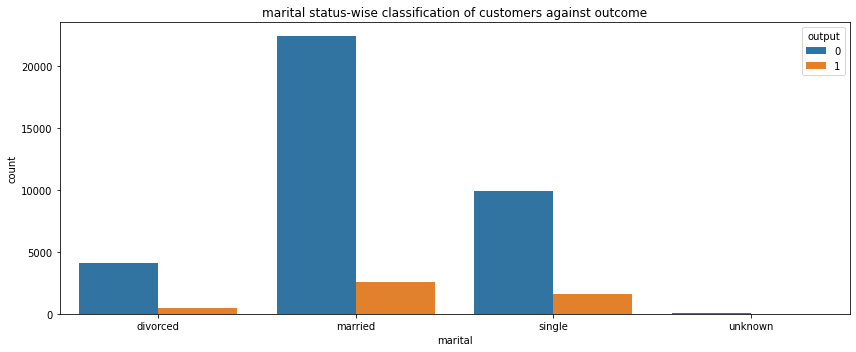

In [35]:
df =  pd.DataFrame(dataset.groupby('marital').output.value_counts()).rename({'output':'count'}, axis = 1).reset_index()

plt.figure(figsize = (12,5))
plt.title('marital status-wise classification of customers against outcome')
sns.barplot(x = 'marital', y = 'count', hue = 'output', data = df)
plt.tight_layout()
plt.show()

### 'default' and 'output/y'

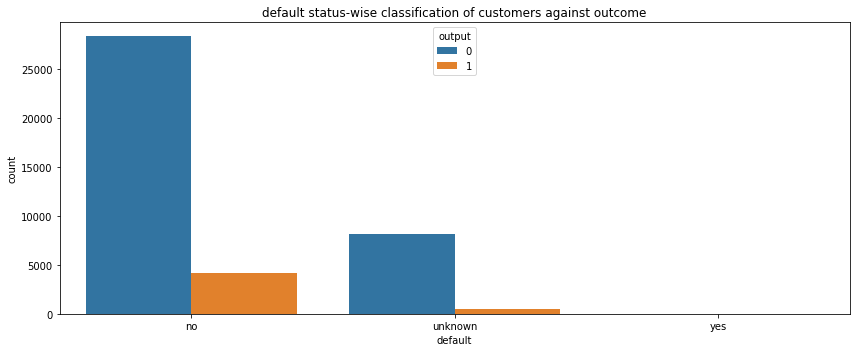

In [36]:
df =  pd.DataFrame(dataset.groupby('default').output.value_counts()).rename({'output':'count'}, axis = 1).reset_index()

plt.figure(figsize = (12,5))
plt.title('default status-wise classification of customers against outcome')
sns.barplot(x = 'default', y = 'count', hue = 'output', data = df)
plt.tight_layout()
plt.show()

### 'housing' and 'output/y'

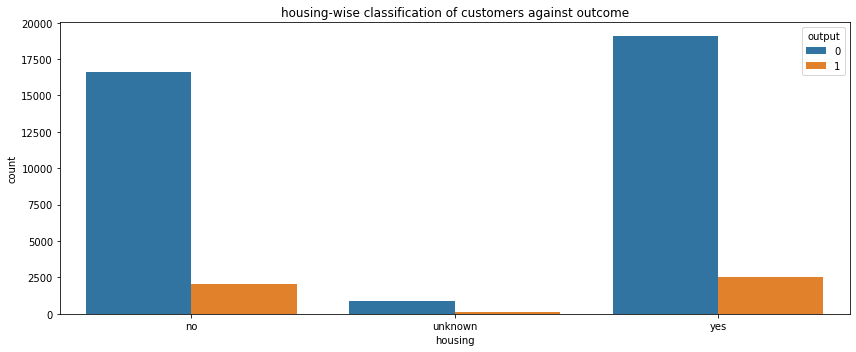

In [37]:
df =  pd.DataFrame(dataset.groupby('housing').output.value_counts()).rename({'output':'count'}, axis = 1).reset_index()

plt.figure(figsize = (12,5))
plt.title('housing-wise classification of customers against outcome')
sns.barplot(x = 'housing', y = 'count', hue = 'output', data = df)
plt.tight_layout()
plt.show()

More people with housing subscribed to term deposite product

### 'loan' and 'output/y'

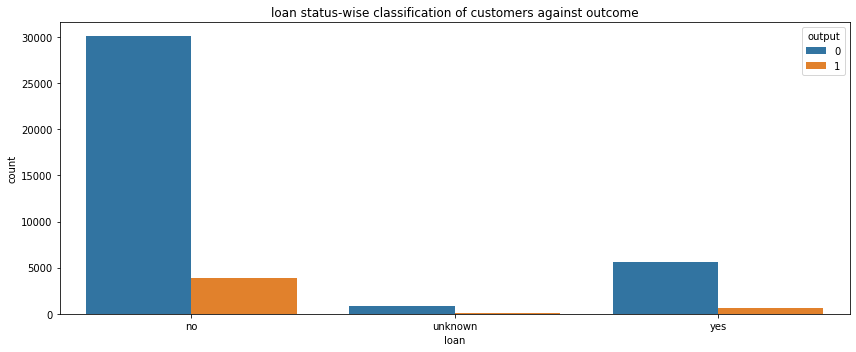

In [38]:
df =  pd.DataFrame(dataset.groupby('loan').output.value_counts()).rename({'output':'count'}, axis = 1).reset_index()

plt.figure(figsize = (12,5))
plt.title('loan status-wise classification of customers against outcome')
sns.barplot(x = 'loan', y = 'count', hue = 'output', data = df)
plt.tight_layout()
plt.show()

There is more customer base with no loan status an more customers with no load subscribed to term deposite

### 'contact' and 'output/y'

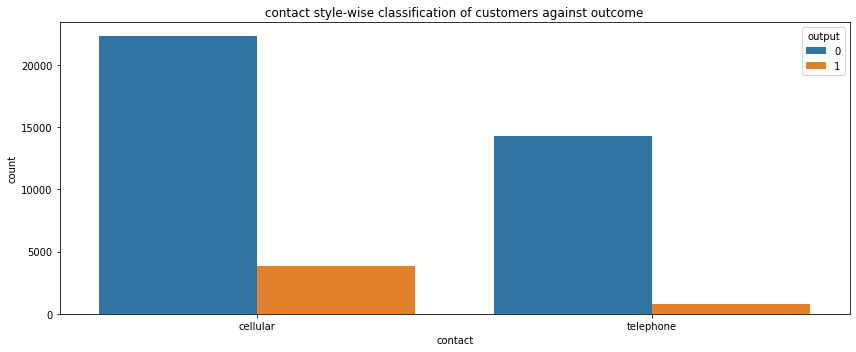

In [39]:
df =  pd.DataFrame(dataset.groupby('contact').output.value_counts()).rename({'output':'count'}, axis = 1).reset_index()

plt.figure(figsize = (12,5))
plt.title('contact style-wise classification of customers against outcome')
sns.barplot(x = 'contact', y = 'count', hue = 'output', data = df)
plt.tight_layout()
plt.show()